# CS5830 Naive Bayes
Chetan Birthare, Zion Steiner

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import praw

### Subreddits
* AskReddit
* WritingPrompts
* TIL
* WorldNews
* UnethicalLifeProTips

### Procedure
1. Collect the 500 top posts titles from each subreddit.
2. Construct feature sets from post title
    * Count Matrix
    * Tfidf Matrix
3. Compare naive bayes performance

In [70]:
# Init API with credentials
reddit = praw.Reddit(client_id='LkHcGBhlOFalGw',client_secret='nylQEtoNMJRLoaCaRK6ukQ78wlc',user_agent='CHETAN BIRTHARE',username='che1016994',password='*121#@airtel')

In [71]:
subs = ['AskReddit', 'WritingPrompts', 'todayilearned', 'worldnews', 'UnethicalLifeProTips']

In [72]:
# // uncomment to again load data. 

# Collect post titles

# df_title = pd.DataFrame(columns=['subreddit', 'title'])
# i=-1
# count=0
# while i<25 :
#     count=count+1
#     i=i+1
#     for sub in subs:
#         subreddit = reddit.subreddit(sub)
#         for post in subreddit.top('all', limit=500):
#             df_title = df_title.append({'subreddit': sub,
#                             'title': post.title.lower()}, ignore_index=True)

In [113]:
# Remove stopwords (a, the, that, etc) from titles

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("would")

df_title = pd.read_csv('C:/Users/docsa/Downloads/titles_65k.csv', index_col=0) 
# // get the file from github

df_title['cleaned_title'] = df_title['title'].apply(lambda title: ' '.join([word for word in title.split() if word not in stop_words]))
# df_title.to_csv('C:/Users/docsa/Downloads/titles.csv')
df_title.sample(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\docsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,subreddit,title,cleaned_title
44869,UnethicalLifeProTips,ulpt: whenever a coworker mentions a food plac...,ulpt: whenever coworker mentions food place li...
62319,UnethicalLifeProTips,ulpt : want someone to stop messaging you? pre...,ulpt : want someone stop messaging you? preten...
50982,WritingPrompts,[wp] after chatting with your online korean fr...,"[wp] chatting online korean friend, often game..."
47526,AskReddit,what mind-blowing (but simple) facts would sat...,mind-blowing (but simple) facts satisfy 4-year...
27090,UnethicalLifeProTips,ulpt: if your child is diagnosed with autism o...,"ulpt: child diagnosed autism cancer, save hund..."
58655,todayilearned,til that the sony playstation was never meant ...,til sony playstation never meant product. inte...
47844,AskReddit,what the weirdest thing you did while you were...,weirdest thing high?
42644,AskReddit,if cats had pockets what would you find in you...,cats pockets find cats pockets?
6275,todayilearned,til that if my name is earl had not been prema...,til name earl prematurely canceled creator pla...
62652,AskReddit,winston churchill famously said “you can alway...,winston churchill famously said “you always co...


In [114]:
df_title.describe()

,subreddit,title,cleaned_title
count,65000,65000,65000
unique,5,2497,2496
top,todayilearned,"ulpt: if a meeting is getting too boring, stan...",ulpt: save business cards people like. ever hi...
freq,13000,52,52


In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

def naive_bayes(X, y, report=True):
    results = cross_validate(estimator=MultinomialNB(),
                         X=X,
                         y=y,
                         scoring=['f1_weighted', 'precision_weighted', 'recall_weighted', 'accuracy'], 
                         cv=10, 
                         return_train_score=False)
    
    for metric in results.keys():
        results[metric] = np.mean([result for result in results[metric] if result > 0])
    
    # Confusion matrix
    y_true = y

    clf = MultinomialNB()
    clf.fit(X, y_true)
    y_pred = clf.predict(X)

    if report:
        plt.figure(figsize=(8, 8))
        ax = sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred, labels=subs), index=subs, columns=subs), annot=True, fmt='')
        ax.set_title('Confusion Matrix')

    f1 = sklearn.metrics.f1_score(y_true, y_pred, average='macro')
    
    if report:
        print('Results')
        print('--------------')
        for metric, value in results.items():
            print(f'{metric.title()}, {value}')
        print()
        print('Entire Dataset f1: ', f1)
    
    return f1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\docsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Results
--------------
Fit_Time, 0.414307165145874
Score_Time, 0.2148203134536743
Test_F1_Weighted, 0.9987991878516569
Test_Precision_Weighted, 0.9988040325920643
Test_Recall_Weighted, 0.9987999999999999
Test_Accuracy, 0.9987999999999999

Entire Dataset f1:  0.9987991927871447


0.9987991927871447

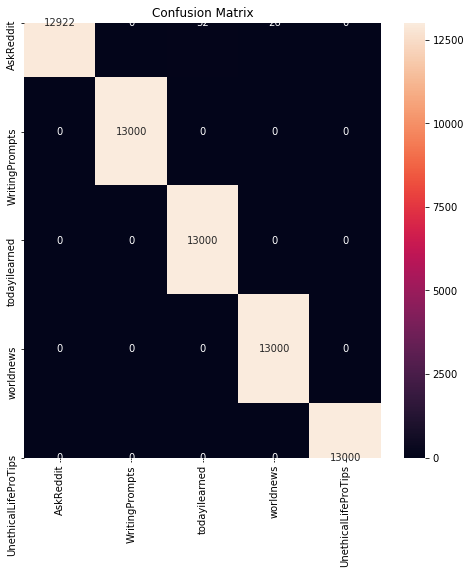

In [116]:
# Count Matrix (Naive features, uncleaned data)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("would")

count_matrix = CountVectorizer().fit_transform(df_title['title'])
naive_bayes(count_matrix, df_title['subreddit'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\docsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Results
--------------
Fit_Time, 0.39734885692596433
Score_Time, 0.20449974536895751
Test_F1_Weighted, 0.9967907149237638
Test_Precision_Weighted, 0.9968146005324225
Test_Recall_Weighted, 0.9968
Test_Accuracy, 0.9968

Entire Dataset f1:  0.9967906879969319


0.9967906879969319

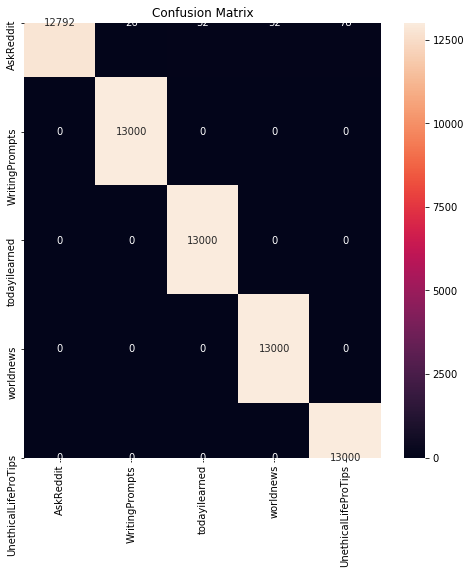

In [117]:
# Count Matrix (Naive features, cleaned data)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("would")

count_matrix = CountVectorizer().fit_transform(df_title['cleaned_title'])
naive_bayes(count_matrix, df_title['subreddit'])

Results
--------------
Fit_Time, 0.4494017601013184
Score_Time, 0.2221829414367676
Test_F1_Weighted, 0.9987995831463701
Test_Precision_Weighted, 0.9988024799204954
Test_Recall_Weighted, 0.9987999999999999
Test_Accuracy, 0.9987999999999999

Entire Dataset f1:  0.9987995975971927


0.9987995975971927

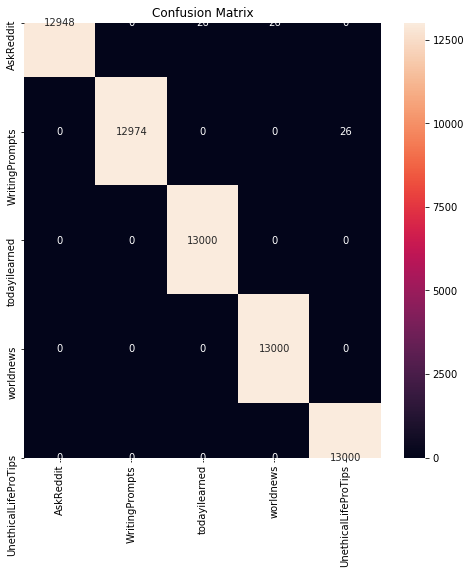

In [118]:
# Term Frequency-Inverse Document Frequency Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(df_title['title'])
naive_bayes(tfidf, df_title['subreddit'])

Results
--------------
Fit_Time, 0.4300496816635132
Score_Time, 0.2196042537689209
Test_F1_Weighted, 0.997196720101124
Test_Precision_Weighted, 0.9972170367293284
Test_Recall_Weighted, 0.9972
Test_Accuracy, 0.9972

Entire Dataset f1:  0.9971967417934247


0.9971967417934247

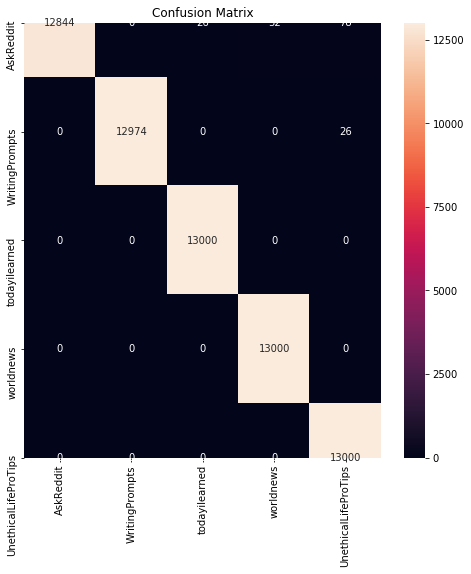

In [119]:
# Term Frequency-Inverse Document Frequency Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(df_title['cleaned_title'])
naive_bayes(tfidf, df_title['subreddit'])

### It seems like word count works slightly better than *tfidm*. Why?

It's possible that important information is lost when the *tfidm* is taken of short documents. Because there are fewer words, maybe values assigned to certain words of importance are overly penalized in *tfidm*. This might lead to a disproportiate effect related to corpus length. 

One example of certain words being overly penalized is words whose interpretation is context-dependent. Context-dependent words might occur more frequently than other words in a corpus because they can be used to have different meanings. However, they are separated from their semantic meaning when counted. The information about their relevance across the corpus is then disproportionately penalized by the document inverse term.

To test this, model performance on both feature sets was collected for post titles stratified by length in words.

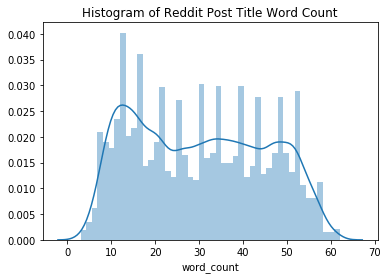

In [120]:
df_title['word_count'] = df_title['title'].str.split().apply(lambda x: len(x))
df_title.to_csv('data/titles.csv')

sns.distplot(df_title['word_count']).set_title('Histogram of Reddit Post Title Word Count')
plt.savefig('imgs/wordCountHist.png')

The word count distribution looks uniformly spread with a mode somewhere between 10-15 words. We'll partition the data by word count ranges of 10.

In [121]:
df_title['word_count'].max() - df_title['word_count'].min()

59

Six groups.

In [122]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings

warnings.filterwarnings(action='ignore')

df_title.sort_values(by='word_count', inplace=True)

count_f1 = [[], []]
tfidf_f1 = [[], []]

inc = 10
for x in range(0, 51, inc):
    data = df_title.loc[(df_title['word_count'] >= x) & (df_title['word_count'] < x+10)]
    
    count_matrix = CountVectorizer().fit_transform(data['title'])
    count_f1[0].append(x)
    count_f1[1].append(naive_bayes(count_matrix, data['subreddit'], report=False))

    tfidf = TfidfVectorizer().fit_transform(data['title'])
    tfidf_f1[0].append(x)
    tfidf_f1[1].append(naive_bayes(tfidf, data['subreddit'], report=False))

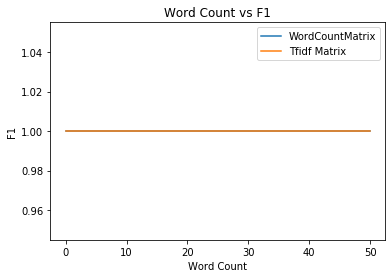

In [123]:
# Plot
# fig, axs = plt.subplots((2, 1), figsize=(8, 8))
ax = sns.lineplot(x=count_f1[0], y=count_f1[1], label='WordCountMatrix')
ax = sns.lineplot(x=tfidf_f1[0], y=tfidf_f1[1], ax=ax, label='Tfidf Matrix')
ax.set_title('Word Count vs F1')
ax.set(xlabel='Word Count', ylabel='F1')
ax.legend()
plt.savefig('imgs/wordCountVF1.png')

It looks like choice of feature set does effect different word count ranges differently. However, the exact mechanism is unknown. 

### Future work
* It would be interesting to compare these results to another test but on longer documents. 
* Would average word length or number of words in title be effectice predictive features for subreddit? 

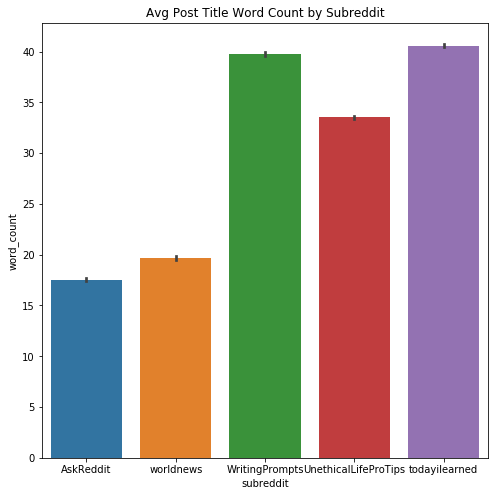

In [124]:
plt.figure(figsize=(8, 8))
sns.barplot(x='subreddit', y='word_count', data=df_title).set_title('Avg Post Title Word Count by Subreddit')
plt.savefig('imgs/word_count_bar.png')

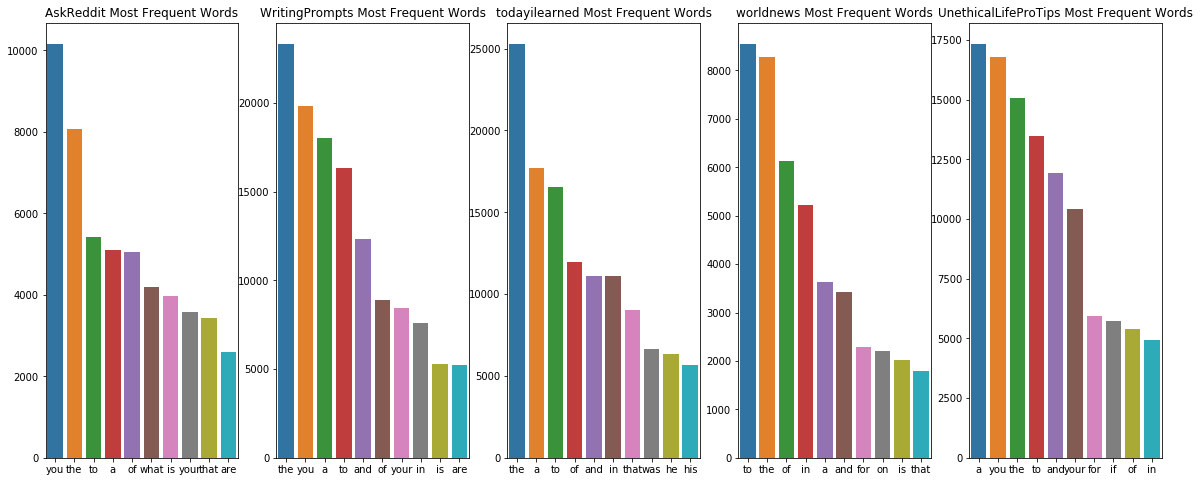

In [125]:
# Top ten words by sub
from collections import defaultdict

fig, axs = plt.subplots(1, 5, figsize=(20, 8))
for i,ax in enumerate(axs):
    data = df_title.loc[df_title['subreddit'] == subs[i]]
    
    corpus = ''
    for title in data['title']:
        corpus += title
    
    word_freq_dict = defaultdict(int)
    for word in corpus.split():
        word_freq_dict[word] += 1
        
    x = []
    y = []
    
    for word, count in sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True):
        x.append(word)
        y.append(count)        
    
    sns.barplot(x=x[:10], y=y[:10], ax=axs[i]).set_title(f'{subs[i]} Most Frequent Words')
    
plt.savefig('imgs/ind_word_count_bar.png')

Mostly useless words. Removing stopwords might make this more informative.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\docsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


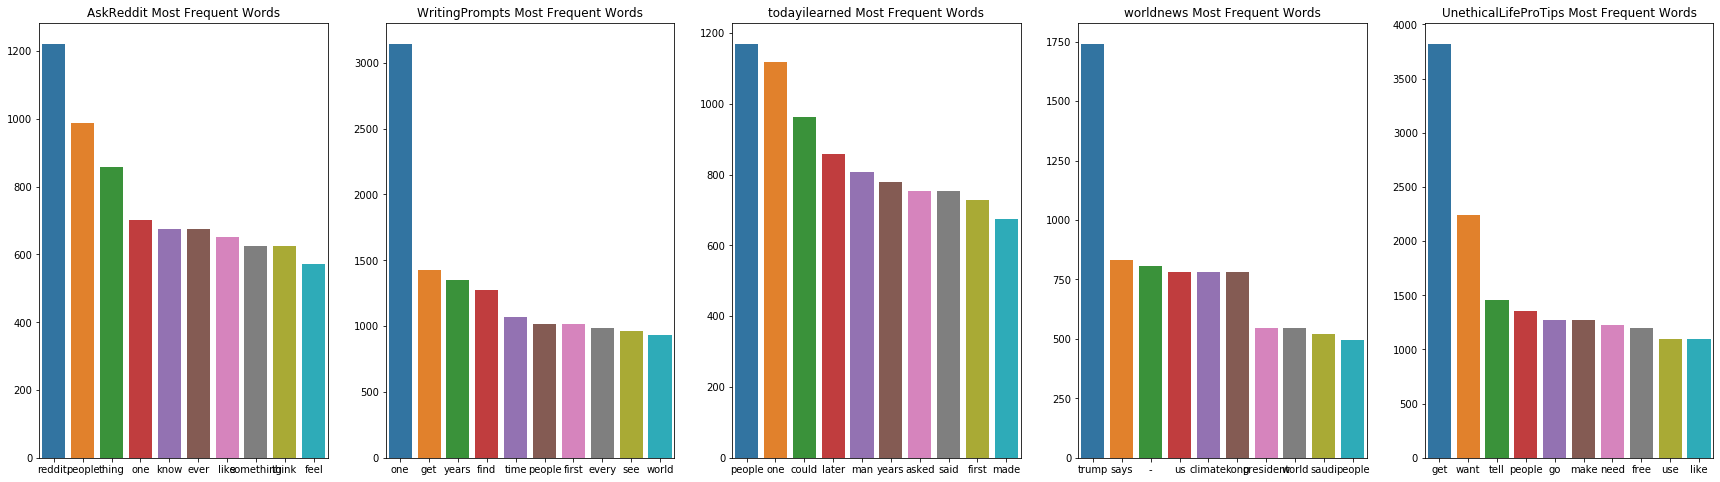

In [126]:
# Top ten words by sub (no stopwords)
from collections import defaultdict
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("would")

fig, axs = plt.subplots(1, 5, figsize=(30, 8))
for i,ax in enumerate(axs):
    data = df_title.loc[df_title['subreddit'] == subs[i]]
    
    corpus = ''
    for title in data['title']:
        corpus += title
    
    word_freq_dict = defaultdict(int)
    for word in [word for word in corpus.split() if word not in stop_words]:
        word_freq_dict[word] += 1
        
    x = []
    y = []
    
    for word, count in sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True):
        x.append(word)
        y.append(count)        
    
    sns.barplot(x=x[:10], y=y[:10], ax=axs[i]).set_title(f'{subs[i]} Most Frequent Words')
    
plt.savefig('imgs/ind_word_count_bar_no_stopwords.png')